In [1]:
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')

In [2]:
ticker = 'AMZN'
data = yf.download(ticker, period='10y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
data['log_return'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
data['mean'] = data['log_return'].rolling(21).mean()
data['std'] = data['log_return'].rolling(21).std()
data.dropna(inplace=True)

In [4]:
data 

,Open,High,Low,Close,Adj Close,Volume,log_return,mean,std
Date,,,,,,,,,
2012-03-21,192.500000,194.279999,191.259995,191.729996,191.729996,4214400,-0.003125,0.002412,0.014420
2012-03-22,190.539993,194.059998,190.259995,192.399994,192.399994,3739600,0.003488,0.003019,0.014170
2012-03-23,192.009995,196.199997,191.800003,195.039993,195.039993,5984000,0.013628,0.004116,0.014051
2012-03-26,196.479996,202.970001,195.500000,202.869995,202.869995,7613700,0.039361,0.005926,0.015991
2012-03-27,203.589996,209.850006,202.880005,205.440002,205.440002,9600800,0.012589,0.006686,0.015907
...,...,...,...,...,...,...,...,...,...
2022-02-14,3035.020020,3168.969971,3033.000000,3103.340088,3103.340088,4022000,0.012148,-0.001821,0.041238
2022-02-15,3152.110107,3160.139893,3092.750000,3130.209961,3130.209961,2848500,0.008621,-0.001682,0.041270
2022-02-16,3115.810059,3176.679932,3094.689941,3162.010010,3162.010010,2635200,0.010108,-0.000245,0.041123


In [5]:
def get_outliers(row, n_sigmas=3):
    x = row['log_return']
    mu = row['mean']
    sigma = row['std']
    if (x > (mu + n_sigmas*sigma)) or (x < (mu - n_sigmas*sigma)):
        return 1
    else:
        return 0

In [6]:
data['outliers'] = data.apply(get_outliers, axis=1)
data['outliers'].value_counts()

0    2474
1      23
Name: outliers, dtype: int64

In [7]:
outliers = data.loc[data['outliers'] == 1, ['log_return']]

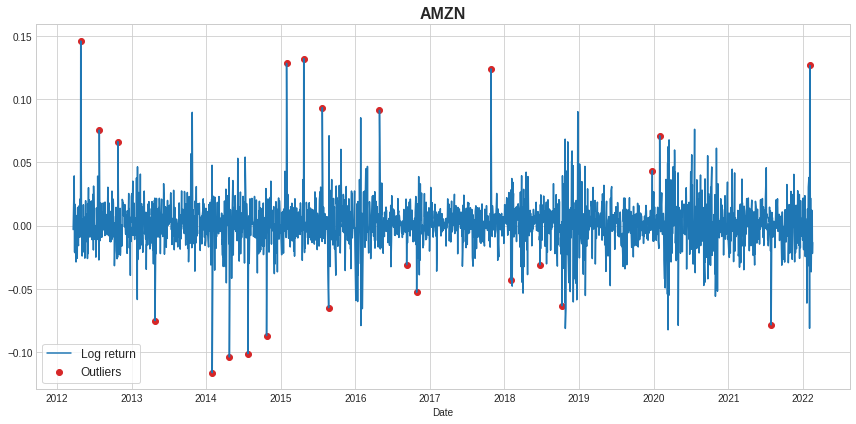

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data.log_return, label='Log return')
plt.scatter(outliers.index, outliers.log_return, label='Outliers', color='tab:red')
plt.xlabel('Date')
plt.title(ticker, fontsize=16, fontweight='bold')
plt.legend(frameon=True, fontsize=12)
plt.tight_layout()
plt.show()